In [4]:
import pandas as pd

### import data & preperation

In [95]:
df = pd.read_csv("international_matches.csv")
qatar_df = pd.read_csv("qatar2022.csv", sep=";")
rank_df = pd.read_csv("fifa_ranking.csv")

In [54]:
df = df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
rank_df = rank_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})
rank_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
63809,1,Brazil,BRA,1841.30,1837.56,0,CONMEBOL,2022-10-06
63811,28,South Korea,KOR,1530.30,1526.02,0,AFC,2022-10-06
63813,30,Tunisia,TUN,1507.54,1507.86,0,CAF,2022-10-06
63814,31,Costa Rica,CRC,1503.59,1500.06,-3,CONCACAF,2022-10-06
63822,38,Australia,AUS,1488.72,1483.73,-1,AFC,2022-10-06


In [161]:
qatar_df

,Team,Group
0,Senegal,A
1,Qatar,A
2,Netherlands,A
3,Ecuador,A
4,Iran,B
5,England,B
6,USA,B
7,Wales,B
8,Argentina,C
9,Saudi Arabia,C


In [99]:
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['score_difference'] = df['home_team_score'] - df['away_team_score']
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['is_stake'] = df['tournament'] != 'Friendly'
df['is_won'] = df['score_difference'] > 0
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,rank_difference,score_difference,point_difference,is_stake,is_won
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,NaN,NaN,NaN,NaN,NaN,37,2,0,True,True
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,NaN,NaN,NaN,NaN,NaN,-6,0,0,False,False
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,NaN,NaN,NaN,NaN,NaN,-59,5,0,True,True
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,NaN,NaN,NaN,NaN,NaN,-21,1,0,False,True
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,NaN,NaN,NaN,NaN,NaN,62,-2,0,True,False


### comparing testing models

In [100]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
X, y = df.loc[:,['rank_difference', 'point_difference', 'is_stake']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [31]:
X_train.head()

,rank_difference,point_difference,is_stake
18864,11,-241,True
17738,-100,495,True
20052,37,-124,True
17944,90,-285,True
19037,-19,48,True


In [32]:
y_train.head()

18864    False
17738     True
20052     True
17944     True
19037     True
Name: is_won, dtype: bool

In [39]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
acc_log = log_reg.score(X_test, y_test)
acc_log

0.6752351097178684

In [40]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
acc_svc = svc.score(X_test,y_test)
acc_svc

0.671473354231975

In [42]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test)
acc_knn

0.6217345872518286

In [43]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gnb_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_test, y_test)
acc_gaussian

0.6743991640543364

In [44]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = random_forest.score(X_test, y_test)
acc_random_forest

0.6478578892371996

### Best Model

In [162]:
models = pd.DataFrame({
    'Model': ['Support Vector', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.675235
4,Naive Bayes,0.674399
0,Support Vector,0.671473
3,Random Forest,0.647858
1,KNN,0.621735


In [46]:
model = log_reg

### prepare df for predictions

In [103]:
# let's define the rankings at the time of the World Cup
rank_df = rank_df.loc[(rank_df['rank_date'] == rank_df['rank_date'].max()) & (rank_df['country_full'].isin(qatar_df['Team'].unique()))]
worldcup_rankings = rank_df.set_index(['country_full'])
worldcup_rankings.sort_values(by='rank').head()

,rank,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
country_full,,,,,,,
Brazil,1,BRA,1841.30,1837.56,0,CONMEBOL,2022-10-06
Belgium,2,BEL,1816.71,1821.92,0,UEFA,2022-10-06
Argentina,3,ARG,1773.88,1770.65,0,CONMEBOL,2022-10-06
France,4,FRA,1759.78,1764.85,0,UEFA,2022-10-06
England,5,ENG,1728.47,1737.46,0,UEFA,2022-10-06


In [104]:
world_cup = qatar_df.set_index(['Team'])
world_cup['points'] = 0
world_cup['total_prob'] = 0
world_cup['expected points'] = 0
world_cup['rank'] = None

country_win_prob = {}

for country in qatar_df['Team'].unique():
    country_win_prob[country] = list()

### calculate the winning probability of each game in the group stage

In [105]:
from itertools import combinations
import numpy as np

In [113]:
for group in set(qatar_df['Group']):
    print('Group {}:'.format(group))
    
    for home, away in combinations(qatar_df.query('Group == "{}"'.format(group)).values, 2):
        print("{} vs. {}: ".format(home[0], away[0]), end=' ')
        
        home = home[0]
        away = away[0]
        
        # Create a row for each match
        row = pd.DataFrame(np.array([[np.nan, np.nan,True]]), columns=X_train.columns)

        home_rank = worldcup_rankings.loc[home, 'rank']
        home_points = worldcup_rankings.loc[home, 'total_points']
        opp_rank = worldcup_rankings.loc[away, 'rank']
        opp_points = worldcup_rankings.loc[away, 'total_points']
        world_cup.loc[home, 'rank'] = home_rank
        world_cup.loc[away, 'rank'] = opp_rank
        
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        # Model Output
        home_win_prob = model.predict_proba(row)[:,1][0]
        
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob

        country_win_prob[home].append(home_win_prob)
        country_win_prob[away].append(1-home_win_prob)
        
         # Saving Model Output
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob

        country_win_prob[home].append(home_win_prob)
        country_win_prob[away].append(1-home_win_prob)
        
        points = 0
        margin = 0.05
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
            world_cup.loc[away, 'expected points'] += (1-home_win_prob) * 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            world_cup.loc[home, 'expected points'] += home_win_prob * 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1
            world_cup.loc[home, 'expected points'] += home_win_prob 
            world_cup.loc[away, 'expected points'] += (1-home_win_prob)

Group F:
Morocco vs. Croatia:  Croatia wins with 0.58
Morocco vs. Belgium:  Belgium wins with 0.63
Morocco vs. Canada:  Morocco wins with 0.57
Croatia vs. Belgium:  Belgium wins with 0.58
Croatia vs. Canada:  Croatia wins with 0.62
Belgium vs. Canada:  Belgium wins with 0.67
Group C:
Argentina vs. Saudi Arabia:  Argentina wins with 0.71
Argentina vs. Mexico:  Draw
Argentina vs. Poland:  Argentina wins with 0.59
Saudi Arabia vs. Mexico:  Mexico wins with 0.71
Saudi Arabia vs. Poland:  Poland wins with 0.65
Mexico vs. Poland:  Draw
Group D:
Denmark vs. Tunisia:  Denmark wins with 0.58
Denmark vs. France:  France wins with 0.56
Denmark vs. Australia:  Denmark wins with 0.62
Tunisia vs. France:  France wins with 0.66
Tunisia vs. Australia:  Draw
France vs. Australia:  France wins with 0.65
Group E:
Germany vs. Japan:  Draw
Germany vs. Spain:  Draw
Germany vs. Costa Rica:  Germany wins with 0.58
Japan vs. Spain:  Spain wins with 0.61
Japan vs. Costa Rica:  Draw
Spain vs. Costa Rica:  Spain 

In [112]:
world_cup.head()

,Group,points,total_prob,expected points,rank
Team,,,,,
Senegal,A,12,9.967137,7.439868,18
Qatar,A,0,6.500425,0.000000,50
Netherlands,A,18,11.758927,11.758927,8
Ecuador,A,6,7.773511,3.338567,44
Iran,B,4,7.898499,1.841926,20


### calculate team performance in the group stage which will decide the best performing team

In [155]:
country_total_prob = []

for country in country_win_prob.keys():
    win_prob_list = country_win_prob[country]

    total_prob = 0
    points = 1
    
    for i in range(3):
        points = points * win_prob_list[i]

    total_prob += points
    
    #expected points after all 3 games
    for i in range(3):
        points = 1
        for j in range(3):
            if i == j:
                points = game_points * (1 - win_prob_list[i])
            else:
                points = game_points * win_prob_list[i]
        total_prob += points
    
    country_total_prob.append((country, total_prob))
    
    print(country, total_prob)

Senegal 0.2415060700341437
Qatar 0.11021113647347253
Netherlands 0.3658870200773294
Ecuador 0.16392062829737847
Iran 0.15958921206858212
England 0.2637345595603148
USA 0.20966689772096764
Wales 0.2029991447792603
Argentina 0.31322363437226963
Saudi Arabia 0.09731898625394234
Mexico 0.27115873839717564
Poland 0.2083214516229562
Denmark 0.23441912204325377
Tunisia 0.1428523608333992
France 0.3243524729218949
Australia 0.14891239206363605
Germany 0.2192061779287854
Japan 0.1637431436843222
Spain 0.28733509137308366
Costa Rica 0.16589497727481434
Morocco 0.15601979020354118
Croatia 0.2261053912911764
Belgium 0.33083368024216436
Canada 0.1346250077697119
Switzerland 0.20739411311445868
Cameroon 0.10883115626874015
Brazil 0.35106224026524196
Serbia 0.22507737695667457
Uruguay 0.24335693183721832
South Korea 0.17460489976816274
Portugal 0.3287946913120302
Ghana 0.10549054393233095


### Top 16

In [156]:
country_total_prob = sorted(country_total_prob, key=lambda x: x[1], reverse=True)
country_total_prob[:16]

[('Netherlands', 0.3658870200773294),
 ('Brazil', 0.35106224026524196),
 ('Belgium', 0.33083368024216436),
 ('Portugal', 0.3287946913120302),
 ('France', 0.3243524729218949),
 ('Argentina', 0.31322363437226963),
 ('Spain', 0.28733509137308366),
 ('Mexico', 0.27115873839717564),
 ('England', 0.2637345595603148),
 ('Uruguay', 0.24335693183721832),
 ('Senegal', 0.2415060700341437),
 ('Denmark', 0.23441912204325377),
 ('Croatia', 0.2261053912911764),
 ('Serbia', 0.22507737695667457),
 ('Germany', 0.2192061779287854),
 ('USA', 0.20966689772096764)]

In [164]:
counter =0
for i in country_total_prob[:16]:
    counter += 1
    print(counter ,i[0], i[1])

1 Netherlands 0.3658870200773294
2 Brazil 0.35106224026524196
3 Belgium 0.33083368024216436
4 Portugal 0.3287946913120302
5 France 0.3243524729218949
6 Argentina 0.31322363437226963
7 Spain 0.28733509137308366
8 Mexico 0.27115873839717564
9 England 0.2637345595603148
10 Uruguay 0.24335693183721832
11 Senegal 0.2415060700341437
12 Denmark 0.23441912204325377
13 Croatia 0.2261053912911764
14 Serbia 0.22507737695667457
15 Germany 0.2192061779287854
16 USA 0.20966689772096764


### from predictions in group stage, choose the top winning countries

In [157]:
print("Top 1:")
print(country_total_prob[0][0], country_total_prob[0][1])
print("Top 3:")
print(country_total_prob[1][0], country_total_prob[1][1])
print(country_total_prob[2][0], country_total_prob[2][1])
print("Top 8:")
print(country_total_prob[3][0], country_total_prob[3][1])
print(country_total_prob[4][0], country_total_prob[4][1])
print(country_total_prob[5][0], country_total_prob[5][1])
print(country_total_prob[6][0], country_total_prob[6][1])
print(country_total_prob[7][0], country_total_prob[7][1])

Top 1:
Netherlands 0.3658870200773294
Top 3:
Brazil 0.35106224026524196
Belgium 0.33083368024216436
Top 8:
Portugal 0.3287946913120302
France 0.3243524729218949
Argentina 0.31322363437226963
Spain 0.28733509137308366
Mexico 0.27115873839717564


<AxesSubplot: xlabel='Country'>

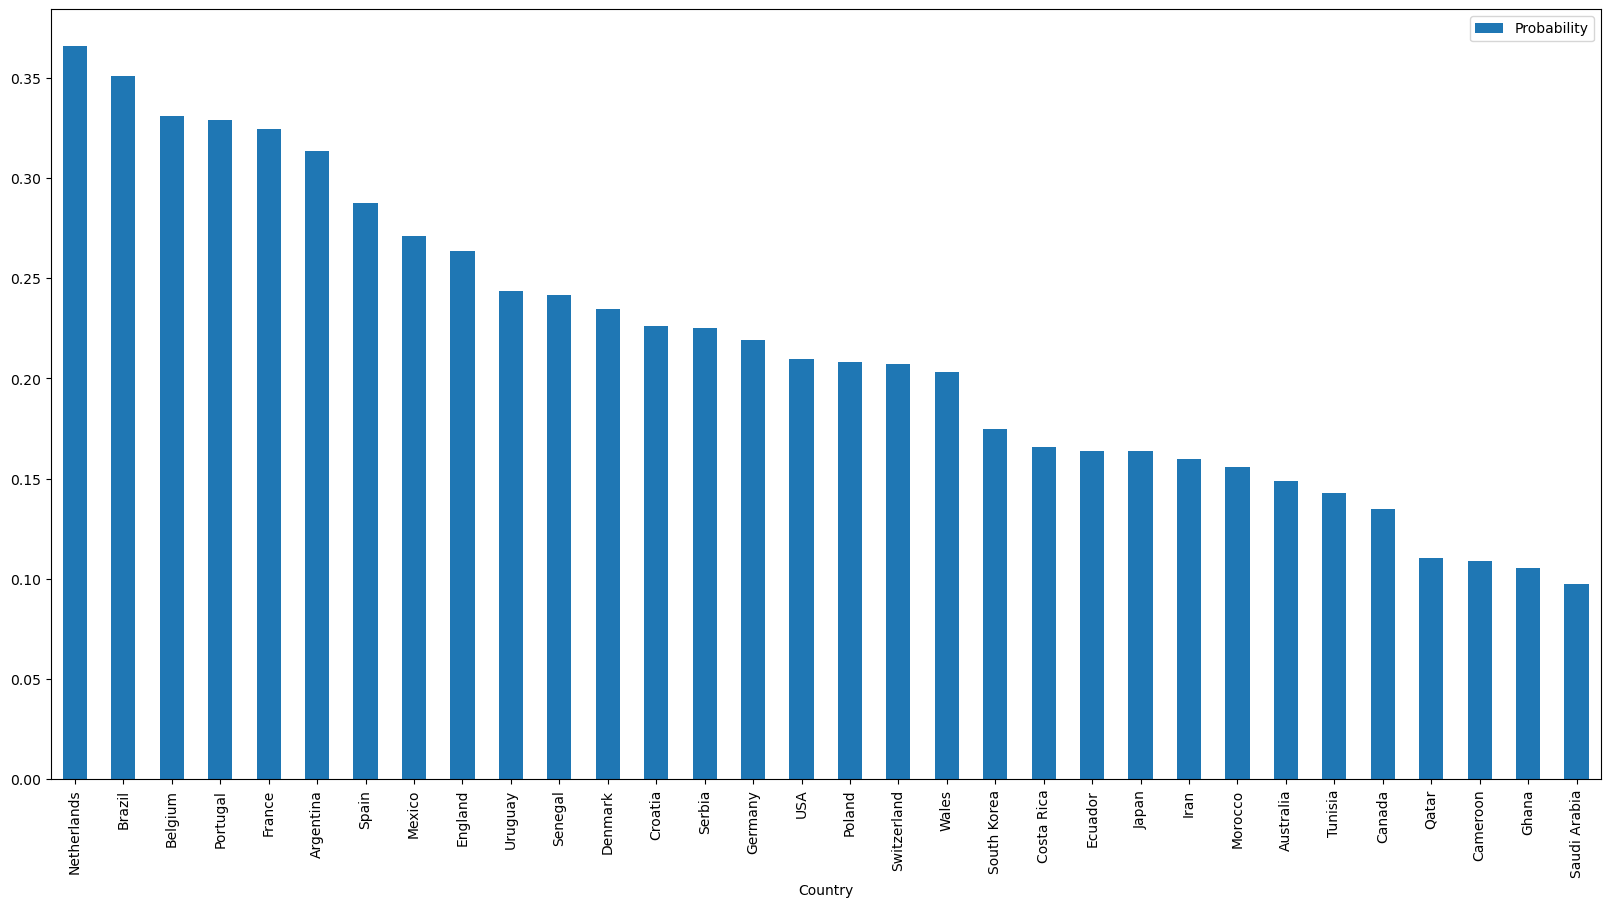

In [151]:
import matplotlib
prob_df = pd.DataFrame(country_total_prob, columns =['Country', 'Probability']) 

prob_df.plot(x="Country", y="Probability", kind="bar", figsize=(20,10))